# Study of experiment results

After execution of each experiment the results of execution will be saved in Numpy NPZ format. The saved data can be used to analyse and visualize the evolutionary process.

In this notebook we are going to examine results of experiments provided with goNEAT implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## The XOR experiment results

We are going to start with the most basic experiment - XOR experiment. You can start it be executing the following command from the root directory of the repository:

```bash
$ run-xor
```

By default the results of the experiment will be saved to the [**out/xor**] folder and the collected experimental data will be saved to the [**out/xor/XOR.npz**] file.

We are going to use that file to examine experimental results. Your results may vary from our results, however the general direction remain the same.

In [2]:
# Loading the NPZ file
xor_data = np.load('XOR.npz')

# Printing the content of the file
for f in xor_data:
    print(f)


trials_fitness
trials_ages
trials_complexity
trial_0_epoch_mean_fitnesses
trial_0_epoch_mean_ages
trial_0_epoch_mean_complexities
trial_0_epoch_best_fitnesses
trial_0_epoch_best_ages
trial_0_epoch_best_complexities
trial_0_epoch_diversity
trial_1_epoch_mean_fitnesses
trial_1_epoch_mean_ages
trial_1_epoch_mean_complexities
trial_1_epoch_best_fitnesses
trial_1_epoch_best_ages
trial_1_epoch_best_complexities
trial_1_epoch_diversity
trial_2_epoch_mean_fitnesses
trial_2_epoch_mean_ages
trial_2_epoch_mean_complexities
trial_2_epoch_best_fitnesses
trial_2_epoch_best_ages
trial_2_epoch_best_complexities
trial_2_epoch_diversity
trial_3_epoch_mean_fitnesses
trial_3_epoch_mean_ages
trial_3_epoch_mean_complexities
trial_3_epoch_best_fitnesses
trial_3_epoch_best_ages
trial_3_epoch_best_complexities
trial_3_epoch_diversity
trial_4_epoch_mean_fitnesses
trial_4_epoch_mean_ages
trial_4_epoch_mean_complexities
trial_4_epoch_best_fitnesses
trial_4_epoch_best_ages
trial_4_epoch_best_complexities
trial_4_e

In [3]:
# We are going to convert results of 8-th trial to the Pandas data frame for better maintainability
# The data frame will be constructed from the results collected from the best organisms (champions) found in each
# generation (epoch) of evolution.
xor_best_org_df_8 = pd.DataFrame(
    {
        "fitness": xor_data['trial_8_epoch_best_fitnesses'],
        "complexity": xor_data['trial_8_epoch_best_complexities'],
        "diversity": xor_data['trial_8_epoch_diversity'],
        "age": xor_data['trial_8_epoch_best_ages'],
    }
)

# Now lets look into the statistics of the collected data
xor_best_org_df_8.describe()

,fitness,complexity,diversity,age
count,71.000000,71.000000,71.000000,71.000000
mean,1.627044,9.112676,29.676056,68.239437
std,1.959789,4.540451,15.632178,4.207017
min,0.032803,7.000000,1.000000,41.000000
25%,0.692308,7.000000,17.500000,69.000000
50%,1.500000,7.000000,30.000000,70.000000
75%,1.802319,11.000000,42.500000,70.000000
max,15.734502,36.000000,52.000000,70.000000


From the table we can see that trial took 71 generation to complete, i.e., to find the successful solver of the XOR experiment. The mean age of winner species is close to the number of generations executed (68.239437), which means that many of the winner species survived almost until successful solver was found by evolution (at least 50%).

Another interesting point to notice is the maximal value of the diversity of the population. The diversity is the number of species in the population. For XOR experiment we used population of 200 organisms. If diversity has value 52 it means that most of the species include only two to three organisms. We got very diverse population with tiny species.

The maximal fitness score is close to the maximal possible (16.0) and considerably exceeds the threshold value of 15.5, which was used to define the successful solver.

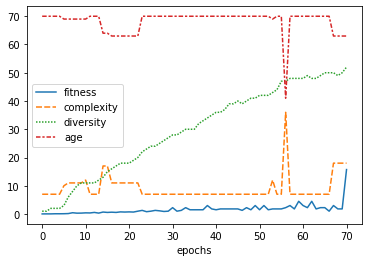

In [4]:
# Now we are going to plot all collected data in one plot as the collected values approximately in the same scale
ax = sns.lineplot(data=xor_best_org_df_8)
ax.set_xlabel('epochs')
plt.show()

The plot above confirms our previous observations and demonstrates that diversity of the population (# of species) increased during the evolution with old species still remaining in the genetic pool. It is interesting to note the massive extinction event occured at about generation #56 when about half of old species was rejected by evolution. Our assumption, that it was caused by sudden spike of genome complexity happened at the same epoch wich was making species too cumbersome to continue the evolution.

The optimal genome configuration of the successful XOR solver is to have 5 nodes with 7 connection genes. 
The five nodes of the optimal genome as follows:
* two input nodes
* one bias node
* one output node
* one hidden node (found during the evolution)

In the trial #8 the optimal genome was not found. However, in trial #7 it was found.

It could be interesting to compare the results collected for these both trials to see the difference.

In [5]:
xor_best_org_df_7 = pd.DataFrame(
    {
        "fitness": xor_data['trial_7_epoch_best_fitnesses'],
        "complexity": xor_data['trial_7_epoch_best_complexities'],
        "diversity": xor_data['trial_7_epoch_diversity'],
        "age": xor_data['trial_7_epoch_best_ages'],
    }
)

# Now lets look into the statistics of the collected data
xor_best_org_df_7.describe()

,fitness,complexity,diversity,age
count,18.000000,18.000000,18.000000,18.000000
mean,1.274090,9.611111,11.944444,14.055556
std,3.621386,2.725455,8.270943,3.038425
min,0.036416,7.000000,1.000000,11.000000
25%,0.125074,7.000000,3.750000,11.000000
50%,0.450120,9.500000,12.000000,14.500000
75%,0.729051,12.000000,18.000000,17.000000
max,15.722252,14.000000,26.000000,17.000000


We can see that trial #7 was able to find successful solver in only 18 generations.

Now, lets see how best species performed during the evolution in this trial.

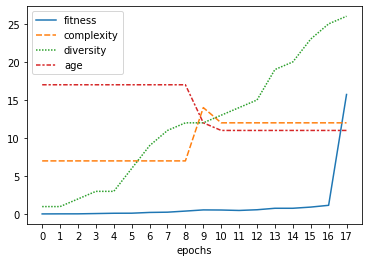

In [6]:
# Now we are going to plot all collected data in one plot as the collected values approximately in the same scale
ticks = len(xor_best_org_df_7['fitness'])
ax = sns.lineplot(data=xor_best_org_df_7)
ax.set_xlabel('epochs')
ax.set_xticks(range(0, ticks))
plt.show()

As in previous example, we can see that number of active species (diversity) increases with each epoch of the evolution and many species survive until the successfull solver was found. Also, at the middle of the evolutionary process we can see sudden jump in the complexity of the genomes, which caused mass extinction of old species (about third of original species) and creation of younger ones. After that, starting from epoch #10 the genome's compexity become optimal (12 = 5 + 7) and evolutionary process only worked to find the relevant weights of connections between nodes of the genome.

The successfull solver was found in sudden evolutionary leap when fitness of the champion organism in the population increased almost eightfold. This is typical for evolutionary processes we observed before. The evolution tries variety of low performing combinations until finding one suitable in one quick move.

## The cart-pole experiment results

Now, let's consider results of more advanced experiment and see how it looks compared to the XOR experiment outlined above.

You can run it by executing the following command in the root folder of this repository:
```bash
$ make run-cartpole
```

We start with loading experiment data and visualization, the same as previously.

In [7]:
# Loading the NPZ file
cart_pole_data = np.load('cart_pole.npz')

# Printing the content of the file
# for f in cart_pole_data:
#     print(f)

In [8]:
# We are going to convert results of 9-th trial to the Pandas data frame for better maintainability
# The data frame will be constructed from the results collected from the best organisms (champions) found in each
# generation (epoch) of evolution.
cart_pole_best_org_df_9 = pd.DataFrame(
    {
        "fitness": cart_pole_data['trial_9_epoch_best_fitnesses'],
        "complexity": cart_pole_data['trial_9_epoch_best_complexities'],
        "diversity": cart_pole_data['trial_9_epoch_diversity'],
        "age": cart_pole_data['trial_9_epoch_best_ages'],
    }
)

# Now lets look into the statistics of the collected data
cart_pole_best_org_df_9.describe()

,fitness,complexity,diversity,age
count,31.000000,31.00000,31.000000,31.00000
mean,0.182451,19.00000,70.548387,10.00000
std,0.196707,1.48324,35.088306,5.46504
min,0.002151,17.00000,1.000000,1.00000
25%,0.063178,18.00000,42.500000,6.00000
50%,0.124977,19.00000,82.000000,9.00000
75%,0.212611,20.00000,98.500000,15.00000
max,1.000000,24.00000,105.000000,21.00000


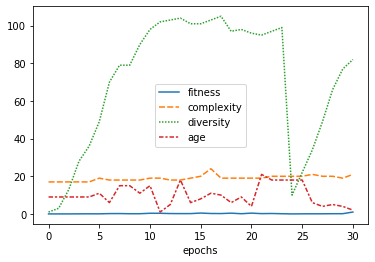

In [9]:
# Now we are going to plot all collected data in one plot as the collected values approximately in the same scale
ax = sns.lineplot(data=cart_pole_best_org_df_9)
ax.set_xlabel('epochs')
plt.show()

In trial #9 of the Cart-Pole experiment we can see another interesting evolution path. The evolution started by accumulating the number of diverse species and quickly reached the theoretical maximum (we have population of 150 organims). After that at generation #23 the catastrophic drop of number of species happened (almost 10-fold) which continued by fast creation of the new species in the epochs that followed this event (almost 8-fold).

Interesting to note, that complexity of the genomes remain almost constant through the evolutionary process.

## The Double-Pole Cart experiment

After looking at experiment intended to find successful balancer of cart with single-pole we are ready to take a look at even more advanced variant. In this experiment, we are trying to find balancer able maintain equlibrium of the cart with two poles attached. We consider the Markovian version of this experiment.

You can run it by executing the following command in the root folder of this repository:
```bash
$ make run-cartpole-two-markov
```

As usually, we start with loading the experiment data.

In [10]:
# Loading the NPZ file
cart_2pole_data = np.load('cart_2pole_markov.npz')

# Printing the content of the file
# for f in cart_2pole_data:
#     print(f)

In [11]:
# We are going to convert results of 9-th trial to the Pandas data frame for better maintainability
# The data frame will be constructed from the results collected from the best organisms (champions) found in each
# generation (epoch) of evolution.
cart_2pole_best_org_df_9 = pd.DataFrame(
    {
        "fitness": cart_2pole_data['trial_9_epoch_best_fitnesses'],
        "complexity": cart_2pole_data['trial_9_epoch_best_complexities'],
        "diversity": cart_2pole_data['trial_9_epoch_diversity'],
        "age": cart_2pole_data['trial_9_epoch_best_ages'],
    }
)

# Now lets look into the statistics of the collected data
cart_2pole_best_org_df_9.describe()

,fitness,complexity,diversity,age
count,20.000000,20.000000,20.000000,20.000000
mean,0.064654,21.800000,620.750000,11.550000
std,0.228458,8.294577,257.404837,5.206019
min,0.000002,15.000000,2.000000,3.000000
25%,0.000280,15.000000,565.750000,5.500000
50%,0.000777,16.000000,761.000000,15.000000
75%,0.001560,28.000000,795.750000,15.000000
max,1.000000,39.000000,822.000000,16.000000


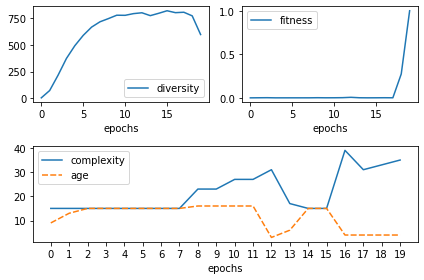

In [12]:
# Now we are going to plot all collected data in one plot as the collected values approximately in the same scale
ticks = len(cart_2pole_best_org_df_9['fitness'])
ax0 = plt.subplot(212)
ax0.set_xlabel('epochs')
ax0.set_xticks(range(0, ticks))
sns.lineplot(data=cart_2pole_best_org_df_9[['complexity', 'age']], ax=ax0 )

ax1 = plt.subplot(221)
ax1.set_xlabel('epochs')
sns.lineplot(data=cart_2pole_best_org_df_9[['diversity']], ax=ax1 )

ax2 = plt.subplot(222)
ax2.set_xlabel('epochs')
sns.lineplot(data=cart_2pole_best_org_df_9[['fitness']], ax=ax2 )

plt.tight_layout()
plt.show()

In this experiment we used population of 1000 organisms. As in previous cases, you can see that diversity of the population almost reached theoretically possible (about 800). However, after genome complexity suddenly increased at generation #16, the diversity of the population began to decline rapidly.

## Discussion

It is always a good idea to visualize the data collected during your experiments. We are visual beings, and good visualization always allows us to better understand the behavior of the process.

The goNEAT library allows you to collect and save data into common formats (Numpy NPZ), which can later be analysed using plenty of available tools.

With help of visualizations presented on this page we was able to make important conclusions about the evolutionary process. The one of the important conclusions is that increasing complexity of the genomes leads to extinction events. In such cases, the evolutionary process tries to rebalance existing species, either by replacing old with new ones, or by drastically reducing the size of the species.

As a rule of a thumb, each extinction event, usually leads to discovery of the successfull solver over time. Thus, we can consider these events as benefitial.